In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/insurance_data.csv")

In [ ]:
data

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [ ]:
X=data.iloc[:,:-1]
y =data.iloc[:,-1]

In [ ]:
X

,age,affordibility
0,22,1
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,0
8,62,1
9,61,1


In [ ]:
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
27    0
Name: bought_insurance, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_test

,age,affordibility
14,49,1
10,18,1
16,25,0
2,47,1
4,46,1
6,55,0
9,61,1


In [ ]:
print(type(X_test))
print(X_test.shape)

<class 'pandas.core.frame.DataFrame'>
(7, 2)


In [ ]:
print(type(y_train))
print(y_train.shape)

<class 'pandas.core.series.Series'>
(21,)


In [ ]:
print(type(y_test))
print(y_test.shape)

<class 'pandas.core.series.Series'>
(7,)


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(),
    # keras.layers.Dense(10,input_shape = (2,),activation="tanh"),
    keras.layers.Dense(2,input_shape = (2,),activation="sigmoid")])
model.compile(optimizer="adam",
            loss = "sparse_categorical_crossentropy",
            metrics =[ "accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 470ms/step - loss: 4.3633 - accuracy: 0.4286
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 4.3296 - accuracy: 0.4286
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 4.2960 - accuracy: 0.4286
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 4.2623 - accuracy: 0.4286
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 4.2287 - accuracy: 0.4286


In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 179ms/step - loss: 2.7687 - accuracy: 0.7143


[2.768674612045288, 0.7142857313156128]

In [ ]:
y_test_pre = model.predict(X_test)

1/1 [==============================] - 0s 79ms/step


In [ ]:
y_test_pre.shape

(7, 2)

In [ ]:
max_index = []
for i in  range(7):
  max = np.argmax(y_test_pre[i])
  max_index.append(max)
y_test_pre_label = np.array(max_index)

In [ ]:
y_test_pre_label.shape

(7,)

In [ ]:
y_test

14    1
10    0
16    1
2     1
4     1
6     0
9     1
Name: bought_insurance, dtype: int64

In [ ]:
y_test_pre_label

array([1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test_pre_label[2]

1

In [ ]:
y_test[3]

KeyError: 3

In [ ]:
np.argmax(y_test_pre[2])

1

In [ ]:
cm = tf.math.confusion_matrix(y_test,y_test_pre_label)
type(cm)

tensorflow.python.framework.ops.EagerTensor

<Axes: >

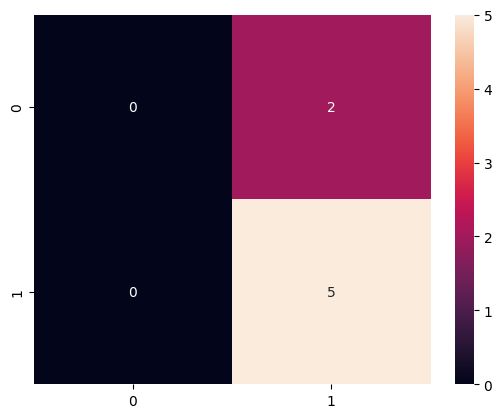

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
model.get_weights()

[array([[-0.49438706, -0.21858588],
        [-0.26176524, -1.0103647 ]], dtype=float32),
 array([ 0.00499989, -0.00499989], dtype=float32)]

In [ ]:
model1 = keras.Sequential([
    keras.layers.Flatten(),
    # keras.layers.Dense(10,input_shape = (2,),activation="tanh"),
    keras.layers.Dense(2,activation="sigmoid")])
model1.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics =[ "accuracy"])

In [ ]:
model1.fit(X_train,y_train,epochs=5)

House Prediction

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [6]:
df.shape

(13320, 9)

In [7]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df = data.fillna(data.mean())

<ipython-input-8-0a5a6b1ab4cb>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = data.fillna(data.mean())


In [9]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.000000,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.000000,488.00


In [10]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [11]:
df['location'].fillna(df['location'].mode()[0],  inplace=True)

In [12]:
df.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [13]:
df['size'].fillna(df['size'].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [15]:
df['society'].fillna(df['society'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [17]:
X=df.iloc[:,:-1]
y =df.iloc[:,-1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [19]:
X_train

,area_type,availability,location,size,society,total_sqft,bath,balcony
2841,Built-up Area,Ready To Move,Neeladri Nagar,1 BHK,AdingSV,527,1.0,0.0
12506,Super built-up Area,Ready To Move,Nagawara Junction,1 BHK,GrrvaGr,500,1.0,2.0
2849,Super built-up Area,Ready To Move,Sarjapur Road,3 BHK,Asncywo,1725,3.0,3.0
3674,Super built-up Area,Ready To Move,Kanakpura Road,2 BHK,Shiew T,1070,2.0,2.0
1081,Super built-up Area,17-Oct,Banashankari,3 BHK,GrrvaGr,1470,2.0,1.0
...,...,...,...,...,...,...,...,...
1926,Super built-up Area,Ready To Move,Sarjapur Road,3 BHK,Adeatlm,1846,3.0,2.0
8529,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,Brnia G,1050,2.0,1.0
944,Super built-up Area,Ready To Move,Kaverappa Layout,2 BHK,Kesomrn,1282,2.0,2.0
12894,Built-up Area,Ready To Move,Ramamurthy Nagar,2 BHK,JHk 1en,960,2.0,2.0


In [20]:
y_train

2841      26.00
12506     51.00
2849      90.00
3674      37.45
1081      88.64
          ...  
1926     140.00
8529      75.00
944       87.00
12894     35.00
7566      54.00
Name: price, Length: 9990, dtype: float64

In [21]:
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
(9990, 8)


In [22]:
print(type(X_test))
print(X_test.shape)

<class 'pandas.core.frame.DataFrame'>
(3330, 8)


In [23]:
print(type(y_train))
print(y_train.shape)

<class 'pandas.core.series.Series'>
(9990,)


In [24]:
print(type(y_test))
print(y_test.shape)

<class 'pandas.core.series.Series'>
(3330,)


In [25]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10,input_shape = (8,),activation="tanh"),
    keras.layers.Dense(1,activation="relu")])
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics =[ "accuracy"])

In [26]:
model.fit(X_train,y_train,epochs=5)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).